## Классификация постов
Используется три архитектуры нейронных сетей:
- Одномерная сверточная нейросеть
- Рекуррентная нейросеть LSTM
- Рекуррентная нейросеть GRU

In [1]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
%matplotlib inline 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина поста
max_len = 11
# Количество классов
nb_classes = 15

## Загрузка набора данных

In [2]:
df_em_1_token_10 = pd.read_csv('df_em_1_token_10.csv', sep=";")

In [3]:
df_em_1_token_10

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
0,😂,5,1,smile,positive/negative,0,почему бы и нет 😂
1,😁,5,1,smile,positive/negative,0,как сесть на диету 😁
2,😁,6,1,smile,positive/negative,0,когда в душе ещё щенок 😁
3,😻,6,1,joy,positive,2,новые фотографии нюши просто огненные😻
4,😍,7,1,joy,positive,2,безумно красивая актриса - алина ланина 😍
...,...,...,...,...,...,...,...
9215,😄,5,1,smile,positive/negative,0,ряды эскортниц скоро пополнится 😄
9216,😂,7,1,smile,positive/negative,0,так он прав ты реально даун 😂
9217,🤔,7,1,no_emotion,neutral/skeptical,1,вы же не про меня?🤔
9218,🤔,9,1,no_emotion,neutral/skeptical,1,про кого пошутил то это не до комик🤔


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df_em_1_token_10, test_size=0.2)

In [6]:
train

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
4377,😁,5,1,smile,positive/negative,0,а воровать не хорошо😁
8707,😰,9,1,fear,negative,5,😰 я о таком и не подумала. сочувствую
1570,😯,9,1,surprise,negative,11,селена даже на свидание спокойно сходить не мо...
5943,😁,8,1,smile,positive/negative,0,леща нужносамому автору дать этого ролика 😁
4530,🤔,8,1,no_emotion,neutral/skeptical,1,а когда они полезные то были?🤔
...,...,...,...,...,...,...,...
6306,🤣,4,1,smile,positive/negative,0,ооо заднеприводный захрюкал🤣
4680,🤣,6,1,smile,positive/negative,0,мне больше ничего не нужно 🤣
1817,😇,9,1,smile,positive/negative,0,красивая семья дмитрия тарасова. детки как ку...
1615,😎,9,1,no_emotion,positive/negative,3,новый день — новые фото от риты оры 😎


Выделяем данные для обучения

In [7]:
posts = train['clean_text']

In [8]:
posts[:5]

4377                                а воровать не хорошо😁
8707                😰 я о таком и не подумала. сочувствую
1570    селена даже на свидание спокойно сходить не мо...
5943          леща нужносамому автору дать этого ролика 😁
4530                       а когда они полезные то были?🤔
Name: clean_text, dtype: object

Выделяем правильные ответы

In [10]:
y_train = utils.to_categorical(train['class'], nb_classes)

In [11]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Токенизация текста

Создаем токенизатор Keras

In [13]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на постах

In [14]:
tokenizer.fit_on_texts(posts)

Просматриваем словарь токенизатора

In [15]:
tokenizer.word_index

{'не': 1,
 'и': 2,
 'в': 3,
 '🤣': 4,
 'а': 5,
 'что': 6,
 'это': 7,
 'на': 8,
 'я': 9,
 '😂': 10,
 '😁': 11,
 'у': 12,
 'так': 13,
 'как': 14,
 'с': 15,
 '😅': 16,
 'то': 17,
 'ты': 18,
 'ну': 19,
 '😄': 20,
 'да': 21,
 'вот': 22,
 'же': 23,
 '🤔': 24,
 'все': 25,
 'за': 26,
 'вы': 27,
 'по': 28,
 '😉': 29,
 'уже': 30,
 'тоже': 31,
 '😏': 32,
 'он': 33,
 '😊': 34,
 'мне': 35,
 'просто': 36,
 '😆': 37,
 'когда': 38,
 'бы': 39,
 'меня': 40,
 'только': 41,
 'для': 42,
 'есть': 43,
 'из': 44,
 'ещё': 45,
 '😍': 46,
 'если': 47,
 'она': 48,
 '😃': 49,
 'там': 50,
 'очень': 51,
 'спасибо': 52,
 'но': 53,
 'они': 54,
 'кто': 55,
 'от': 56,
 '😎': 57,
 'к': 58,
 'нет': 59,
 'было': 60,
 'всё': 61,
 'будет': 62,
 'надо': 63,
 'без': 64,
 'можно': 65,
 'его': 66,
 'тебя': 67,
 '😳': 68,
 'тебе': 69,
 'даже': 70,
 '❤': 71,
 'лучше': 72,
 'может': 73,
 'или': 74,
 'до': 75,
 'вообще': 76,
 'этот': 77,
 'вам': 78,
 'где': 79,
 'какой': 80,
 'тут': 81,
 'тогда': 82,
 'чем': 83,
 'зачем': 84,
 'точно': 85,
 'вас'

Преобразуем посты в числовое представление

In [16]:
sequences = tokenizer.texts_to_sequences(posts)

In [18]:
index = 1
print(posts[index])
print(sequences[index])

как сесть на диету 😁
[10, 9, 118, 17, 70, 744, 7, 1, 236]


In [20]:
tokenizer.word_index['сесть']

5083

Ограничиваем длину постов

In [21]:
x_train = pad_sequences(sequences, maxlen=max_len)

In [22]:
x_train[:5]

array([[   0,    0,    0,    0,    7,  898,  547,  159,   39, 1692,  488],
       [   0,    0,   10,    9,  118,   17,   70,  744,    7,    1,  236],
       [   0,    0,    0,    0,  107,  289,   41,    8,   66, 1693,   37],
       [   0,    0,    0,    0,    0,    0,    0,  630,   44, 3033,   10],
       [   0,    0, 3034, 1694, 1161,    2,    3, 1695,  290,  899,  135]],
      dtype=int32)

In [24]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [25]:
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [26]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Сверточная нейронная сеть

In [27]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(15, activation='softmax'))

In [28]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [29]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 11, 32)            320000    
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 250)            40250     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 250)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               32128     
                                                                 
 dense_3 (Dense)             (None, 15)                1935      
                                                                 
Total params: 394,313
Trainable params: 394,313
Non-trainable params: 0
________________________________________________

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [30]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [31]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=10,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 1.7499 - accuracy: 0.6241 - f1_m: 0.3773 - precision_m: 0.4235 - recall_m: 0.3537
Epoch 1: val_accuracy improved from -inf to 0.66260, saving model to best_model_cnn.h5
52/52 [==============================] - 19s 159ms/step - loss: 1.7499 - accuracy: 0.6241 - f1_m: 0.3773 - precision_m: 0.4235 - recall_m: 0.3537 - val_loss: 1.3016 - val_accuracy: 0.6626 - val_f1_m: 0.6638 - val_precision_m: 0.6642 - val_recall_m: 0.6634
Epoch 2/10
52/52 [==============================] - ETA: 0s - loss: 1.1936 - accuracy: 0.6412 - f1_m: 0.6434 - precision_m: 0.7515 - recall_m: 0.5716
Epoch 2: val_accuracy improved from 0.66260 to 0.67751, saving model to best_model_cnn.h5
52/52 [==============================] - 4s 66ms/step - loss: 1.1936 - accuracy: 0.6412 - f1_m: 0.6434 - precision_m: 0.7515 - recall_m: 0.5716 - val_loss: 1.0965 - val_accuracy: 0.6775 - val_f1_m: 0.5864 - val_precision_m: 0.8842 - val_recall_m: 0.4393
Epoch 3/10
51

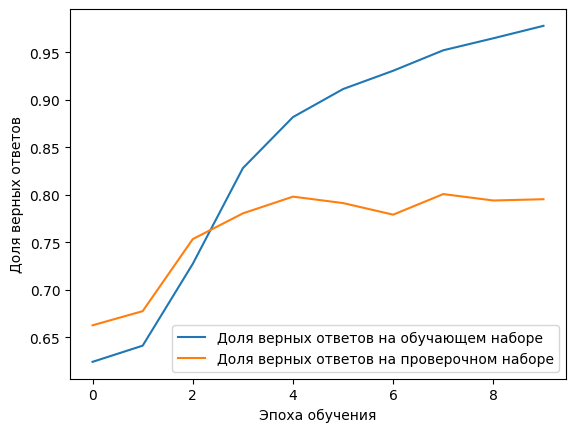

In [32]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть LSTM

In [33]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(15, activation='softmax'))

In [34]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [35]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 11, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense_4 (Dense)             (None, 15)                255       
                                                                 
Total params: 323,391
Trainable params: 323,391
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [36]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [37]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=10,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/10
48/52 [==========================>...] - ETA: 0s - loss: 2.4001 - accuracy: 0.6147 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.66260, saving model to best_model_lstm.h5
52/52 [==============================] - 10s 132ms/step - loss: 2.3438 - accuracy: 0.6163 - f1_m: 0.0048 - precision_m: 0.0276 - recall_m: 0.0027 - val_loss: 1.5189 - val_accuracy: 0.6626 - val_f1_m: 0.6193 - val_precision_m: 0.7598 - val_recall_m: 0.5237
Epoch 2/10
52/52 [==============================] - ETA: 0s - loss: 1.3945 - accuracy: 0.6409 - f1_m: 0.6388 - precision_m: 0.6498 - recall_m: 0.6316
Epoch 2: val_accuracy did not improve from 0.66260
52/52 [==============================] - 3s 61ms/step - loss: 1.3945 - accuracy: 0.6409 - f1_m: 0.6388 - precision_m: 0.6498 - recall_m: 0.6316 - val_loss: 1.2635 - val_accuracy: 0.6626 - val_f1_m: 0.6654 - val_precision_m: 0.6674 - val_recall_m: 0.6634
Epoch 3/10
51/52 [=====================

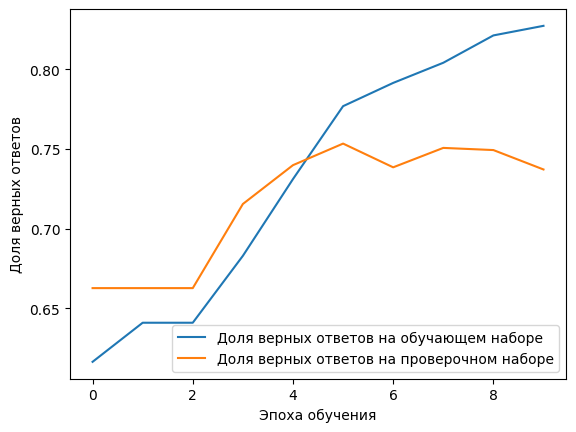

In [38]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть GRU

In [39]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_len))
model_gru.add(GRU(16))
model_gru.add(Dense(15, activation='softmax'))

In [40]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [41]:
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 11, 32)            320000    
                                                                 
 gru (GRU)                   (None, 16)                2400      
                                                                 
 dense_5 (Dense)             (None, 15)                255       
                                                                 
Total params: 322,655
Trainable params: 322,655
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model_gru.h5

In [42]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [43]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=10,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 2.4056 - accuracy: 0.5982 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.66260, saving model to best_model_gru.h5
52/52 [==============================] - 9s 136ms/step - loss: 2.4056 - accuracy: 0.5982 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.6740 - val_accuracy: 0.6626 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
52/52 [==============================] - ETA: 0s - loss: 1.3524 - accuracy: 0.6409 - f1_m: 0.5527 - precision_m: 0.6090 - recall_m: 0.5299
Epoch 2: val_accuracy did not improve from 0.66260
52/52 [==============================] - 3s 63ms/step - loss: 1.3524 - accuracy: 0.6409 - f1_m: 0.5527 - precision_m: 0.6090 - recall_m: 0.5299 - val_loss: 1.1990 - val_accuracy: 0.6626 - val_f1_m: 0.6910 - val_precision_m: 0.7212 - val_recall_m: 0.6634
Epoch 3/10
52/52 

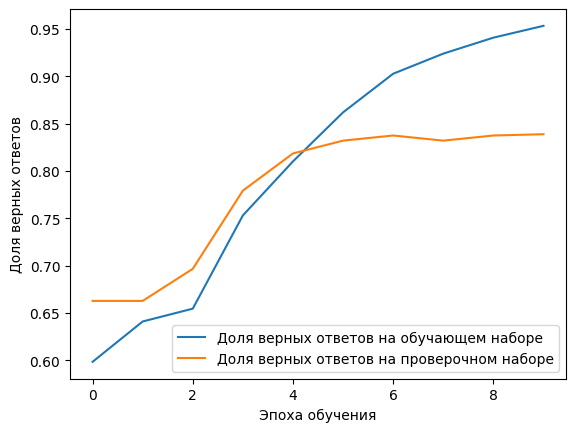

In [44]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем набор данных для тестирования


In [9]:
test

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
7951,😐,5,1,no_emotion,neutral/skeptical,1,"пояснительную бригаду, пожалуйста!😐"
6319,😅,8,1,smile,positive/negative,0,ага начнём с вас!!!😅
5196,😉,9,1,smile,positive/negative,0,"марионетки дьявола: за деньги , любой каприз...😉"
6336,😬,3,1,no_emotion,neutral/skeptical,1,дышать мешала 😬
2897,🤣,2,1,smile,positive/negative,0,я🤣
...,...,...,...,...,...,...,...
8578,🤔,7,1,no_emotion,neutral/skeptical,1,в 14 по лужам скачет....🤔
5477,😁,5,1,smile,positive/negative,0,это наш кашерный товарищ 😁
2358,😄,9,1,smile,positive/negative,0,не очень хороший повод радоваться )))😄
5630,😁,6,1,smile,positive/negative,0,100%😁 но я тоже


Преобразуем посты в числовое представление

Нужно использовать токенизатор, обученный на наборе данных train.

In [46]:
test_sequences = tokenizer.texts_to_sequences(test['clean_text'])

In [47]:
x_test = pad_sequences(test_sequences, maxlen=max_len)

In [48]:
x_test[:5]

array([[   0,    0,    0,    0,    0,  446,    9,    7,  187,   79,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,  151, 8965,   10],
       [   0,    0,    0,    0,    0,  790,   99,  234,   84,   18,   11],
       [   0,    0,    0,   15,  644,    1,   59, 1807, 5744,   26,   16],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   14,  333]],
      dtype=int32)

Правильные ответы

In [49]:
y_test = utils.to_categorical(test['class'], nb_classes)

In [50]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Оцениваем качество работы сети на тестовом наборе данных


### Одномерная сверточная сеть

In [51]:
model_cnn.load_weights(model_cnn_save_path)

In [52]:
loss, accuracy, f1_score, precision, recall = model_cnn.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 5ms/step - loss: 0.9913 - accuracy: 0.8167 - f1_m: 0.8261 - precision_m: 0.8875 - recall_m: 0.7742


### Сеть LSTM

In [53]:
model_lstm.load_weights(model_lstm_save_path)

In [54]:
loss, accuracy, f1_score, precision, recall = model_lstm.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 7ms/step - loss: 0.9469 - accuracy: 0.7522 - f1_m: 0.7286 - precision_m: 0.8644 - recall_m: 0.6327


### Сеть GRU

In [55]:
model_gru.load_weights(model_gru_save_path)

In [56]:
loss, accuracy, f1_score, precision, recall = model_gru.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.8514 - f1_m: 0.8426 - precision_m: 0.8934 - recall_m: 0.7989


In [59]:
test['clean_text'][592]
#test['clean_text'][4445]

'что с ней произошло😱'

In [60]:
#test['class'][2384], test['emotion'][2384], test['tonality'][2384]
test['class'][592], test['emotion'][592], test['tonality'][592]

(5, 'fear', 'negative')

In [61]:
#text = test['clean_text'][2384]
text = test['clean_text'][592]

In [62]:
sequence = tokenizer.texts_to_sequences([text])

In [63]:
sequence

[[6, 15, 516]]

In [64]:
data = pad_sequences(sequence, maxlen=max_len)

In [65]:
data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   6,  15, 516]],
      dtype=int32)

In [66]:
emoji_dict = {"0":"smile positive/negative", "1":"no_emotion neutral/skeptical", "2":"joy positive",
              "3":"no_emotion positive/negative", "4":"sadness negative", "5":"fear negative",
              "6":"shame negative","7":"anger negative", "8":"disgust negative",
              "9":"surprise positive/negative","10":"disgust neutral/skeptical", "11":"surprise negative",
              "12":"no_emotion negative","13":"sadness positive/negative", "14":"fear positive/negative"}

### Одномерная сверточная сеть

In [67]:
result_cnn = model_cnn.predict(data)

1/1 [==============================] - 0s 188ms/step


In [68]:
result_cnn

array([[7.9391706e-01, 3.5928506e-03, 6.1014731e-04, 4.9357004e-03,
        2.9607313e-03, 1.2383058e-02, 7.0596829e-02, 4.9255088e-02,
        4.5594103e-03, 2.4405418e-02, 1.5093631e-02, 8.8200262e-03,
        2.3044425e-03, 3.6943781e-03, 2.8712654e-03]], dtype=float32)

### Сеть LSTM

In [69]:
result_lstm = model_lstm.predict(data)

1/1 [==============================] - 0s 339ms/step


In [70]:
result_lstm

array([[0.5196431 , 0.13709122, 0.12712626, 0.07288931, 0.04049649,
        0.01569936, 0.01506882, 0.01186225, 0.01128517, 0.01325308,
        0.00561206, 0.00748036, 0.00721395, 0.00877739, 0.00650117]],
      dtype=float32)

### Сеть GRU

In [71]:
result_gru = model_gru.predict(data)

1/1 [==============================] - 0s 307ms/step


In [72]:
result_gru

array([[0.42541006, 0.12364064, 0.07855156, 0.12973064, 0.13426968,
        0.02687187, 0.01763781, 0.01354659, 0.01028935, 0.00552618,
        0.0047384 , 0.00829915, 0.00669424, 0.00699399, 0.00779992]],
      dtype=float32)